# Geometric Transformations of Images

## Goals

* Learn to apply different geometric transformation to images like translation, rotation, affine transformation etc.
* You will see these functions: `cv2.getPerspectiveTransform`

## Transformations

OpenCV provides two transformation functions, `cv2.warpAffine` and `cv2.warpPerspective`, with which you can have all kinds of transformations. 

`cv2.warpAffine` takes a 2x3 transformation matrix while `cv2.warpPerspective` takes a 3x3 transformation matrix as input.

## Scaling

Scaling is just resizing of the image. 

OpenCV comes with a function `cv2.resize()` for this purpose. 

The size of the image can be specified manually, or you can specify the scaling factor. 

Different interpolation methods are used. 

Preferable interpolation methods are `cv2.INTER_AREA` for **shrinking** and `cv2.INTER_CUBIC` (slow) & `cv2.INTER_LINEAR` for **zooming**. 

By default, interpolation method used is `cv2.INTER_LINEAR` for all resizing purposes. 

You can resize an input image either of following methods:

In [14]:
import cv2
import numpy as np

img = cv2.imread('messi5.jpg')

res = cv2.resize(img,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)

#OR

height, width = img.shape[:2]
res = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)

## Translation

Translation is the shifting of object’s location. If you know the shift in $(x,y)$ direction, let it be $(t_x,t_y)$, you can create the transformation matrix $\textbf{M}$ as follows:

$$
M = \begin{bmatrix} 
1 & 0 & t_x \\ 
0 & 1 & t_y  
\end{bmatrix}
$$

You can take make it into a **Numpy array of type** `np.float32` and pass it into `cv2.warpAffine()` function. 

See below example for a shift of (100,50):

In [15]:
import cv2
import numpy as np

img = cv2.imread('data/messi5.jpg',0)
rows,cols = img.shape

M = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(img,M,(cols,rows))

cv2.imshow('img',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Rotation

Rotation of an image for an angle $\theta$ is achieved by the transformation matrix of the form

$$
M = \begin{bmatrix} 
cos\theta & -sin\theta \\ 
sin\theta & cos\theta   
\end{bmatrix}
$$

But OpenCV provides scaled rotation with adjustable center of rotation so that you can rotate at any location you prefer. Modified transformation matrix is given by

$$
\begin{bmatrix} 
\alpha &  \beta & (1- \alpha )  \cdot center.x -  \beta \cdot center.y \\ 
- \beta &  \alpha &  \beta \cdot center.x + (1- \alpha )  \cdot center.y 
\end{bmatrix}
$$

where:

$$
\begin{array}{l} 
\alpha =  scale \cdot \cos \theta , \\ 
\beta =  scale \cdot \sin \theta 
\end{array}
$$

To find this transformation matrix, OpenCV provides a function, `cv2.getRotationMatrix2D`. 

Check below example which rotates the image by 90 degree with respect to center without any scaling.

In [18]:
img = cv2.imread('data/messi5.jpg',0)
rows,cols = img.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
dst = cv2.warpAffine(img,M,(cols,rows))

cv2.imshow('img',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Affine Transformation

In affine transformation, all parallel lines in the original image will still be parallel in the output image. 

To find the transformation matrix, we need **three points** from input image and their corresponding locations in output image. 

Then `cv2.getAffineTransform` will create a 2x3 matrix which is to be passed to `cv2.warpAffine`.

Check below example, and also look at the points I selected (which are marked in Green color):

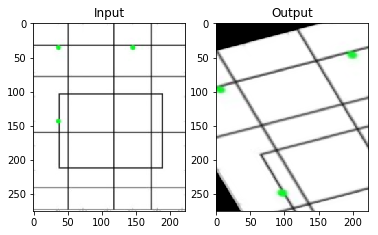

In [12]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('data/drawing.png')
rows,cols,ch = img.shape

pts1 = np.float32([[38,38],[145,38],[38,145]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(img,M,(cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

In [13]:
import cv2
import numpy as np

points = []

# 왼쪽 상단, 오른쪽 상단, 왼쪽 하단, 오른쪽 하단 순으로 클릭하시오.

# mouse callback function
def draw_circle(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        global points
        cv2.circle(img,(x,y),10,(255,0,0),-1)
        print(x,y)
        points.append([x,y])
        
        
# Create a black image, a window and bind the function to window
img = cv2.imread('data/drawing.png')
rows,cols,ch = img.shape
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
    cv2.imshow('image',img)
    if cv2.waitKey(20) & 0xFF == 27: # enter ESC
        break
    if len(points) == 3:
        pts1 = np.float32(points)
        pts2 = np.float32([[10,100],[200,50],[100,250]])
        M = cv2.getAffineTransform(pts1,pts2)        
        dst = cv2.warpAffine(img,M,(cols,rows))
        cv2.imshow('after',dst)
        
cv2.destroyAllWindows()

38 36
146 35
38 143


## Perspective Transformation

For perspective transformation, you need a 3x3 transformation matrix. 

Straight lines will remain straight even after the transformation. 
* Perspective(원근법) 변환은 선의 성질만 유지(직선은 변환 후에도 직선)
* 단, 선의 평행성은 유지가 되지 않음

To find this transformation matrix, you need 4 points on the input image and corresponding points on the output image. 
* Among these 4 points, 3 of them should not be collinear. 

Then transformation matrix can be found by the function `cv2.getPerspectiveTransform`. 

Then apply `cv2.warpPerspective` with this 3x3 transformation matrix.

See the code below:

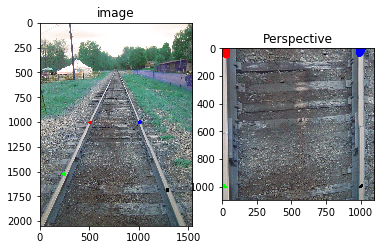

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('data/Railroad-Tracks-Perspective.jpg')
# [x,y] 좌표점을 4x2의 행렬로 작성
# 좌표점은 좌상->좌하->우상->우하
pts1 = np.float32([[504,1003],[243,1525],[1000,1000],[1280,1685]])

# 좌표의 이동점
pts2 = np.float32([[10,10],[10,1000],[1000,10],[1000,1000]])

# pts1의 좌표에 표시. perspective 변환 후 이동 점 확인.
cv2.circle(img, (504,1003), 20, (255,0,0),-1)
cv2.circle(img, (243,1524), 20, (0,255,0),-1)
cv2.circle(img, (1000,1000), 20, (0,0,255),-1)
cv2.circle(img, (1280,1685), 20, (0,0,0),-1)

M = cv2.getPerspectiveTransform(pts1, pts2)

dst = cv2.warpPerspective(img, M, (1100,1100))

plt.subplot(121),plt.imshow(img),plt.title('image')
plt.subplot(122),plt.imshow(dst),plt.title('Perspective')
plt.show()


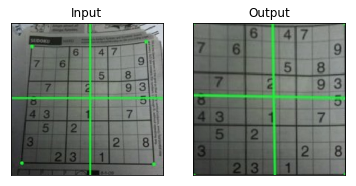

In [11]:
img = cv2.imread('data/sudokusmall.png')
rows,cols,ch = img.shape

pts1 = np.float32([[62,69],[392,54],[31,404],[413,410]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(300,300))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.xticks([]);plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.xticks([]);plt.yticks([])
plt.show()

In [5]:
import cv2
import numpy as np

points = []

# 왼쪽 상단, 오른쪽 상단, 왼쪽 하단, 오른쪽 하단 순으로 클릭하시오.

# mouse callback function
def draw_circle(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        global points
        cv2.circle(img,(x,y),10,(255,0,0),-1)
        print(x,y)
        points.append([x,y])
        
        
# Create a black image, a window and bind the function to window
img = cv2.imread('data/sudoku.png')
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
    cv2.imshow('image',img)
    if cv2.waitKey(20) & 0xFF == 27: # enter ESC
        break
    if len(points) == 4:
        pts1 = np.float32(points)
        pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
        M = cv2.getPerspectiveTransform(pts1,pts2)        
        dst = cv2.warpPerspective(img,M,(300,300))
        cv2.imshow('after',dst)
        
cv2.destroyAllWindows()

75 87
492 72
39 515
518 519
